In [1]:
import os

# select the first GPU
os.environ['CUDA_VISIBLE_DEVICES'] = str(0)

In [2]:
import sys

sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2

from gpx.regression import gpr_fit, gpr_predict, gpr_optimize
from gpx.kernels import se_kernel, kmap

In [4]:
import jax
import jax.numpy as jnp
import jax.random as random
from jax import vmap, grad, jit

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
train_x = jnp.linspace(0, 1, 100)
key = random.PRNGKey(0)
train_y = jnp.sin(train_x * (2 * jnp.pi)) + random.normal(key, shape=train_x.shape) * jnp.sqrt(0.04)
test_x = jnp.linspace(-0.5, 1.5, 51)
test_y = jnp.sin(test_x * (2 * jnp.pi)) + random.normal(key, shape=test_x.shape) * jnp.sqrt(0.04)

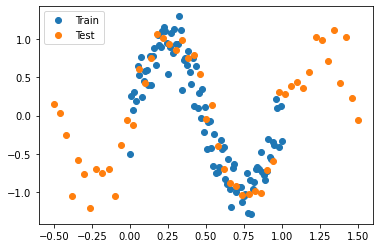

In [7]:
plt.plot(train_x, train_y, 'o', label='Train')
plt.plot(test_x, test_y, 'o', label='Test')
plt.legend()

In [8]:
# parameters
params = dict(
    sigma = 0.5,
    kernel_params=dict(lengthscale = 1.0),
)

In [9]:
# Dual coefficients and target mean
c, y_mean = gpr_fit(params, train_x, train_y, kernel=se_kernel)

# Train prediction
train_y_pred, C_train = gpr_predict(params, train_x, train_x, c, y_mean, kernel=se_kernel, full_covariance=True)
train_conf = 2. * jnp.sqrt(jnp.diag(C_train))

# Test prediction
test_y_pred, C_test = gpr_predict(params, train_x, test_x, c, y_mean, kernel=se_kernel, full_covariance=True)
test_conf = 2. * jnp.sqrt(jnp.diag(C_test))

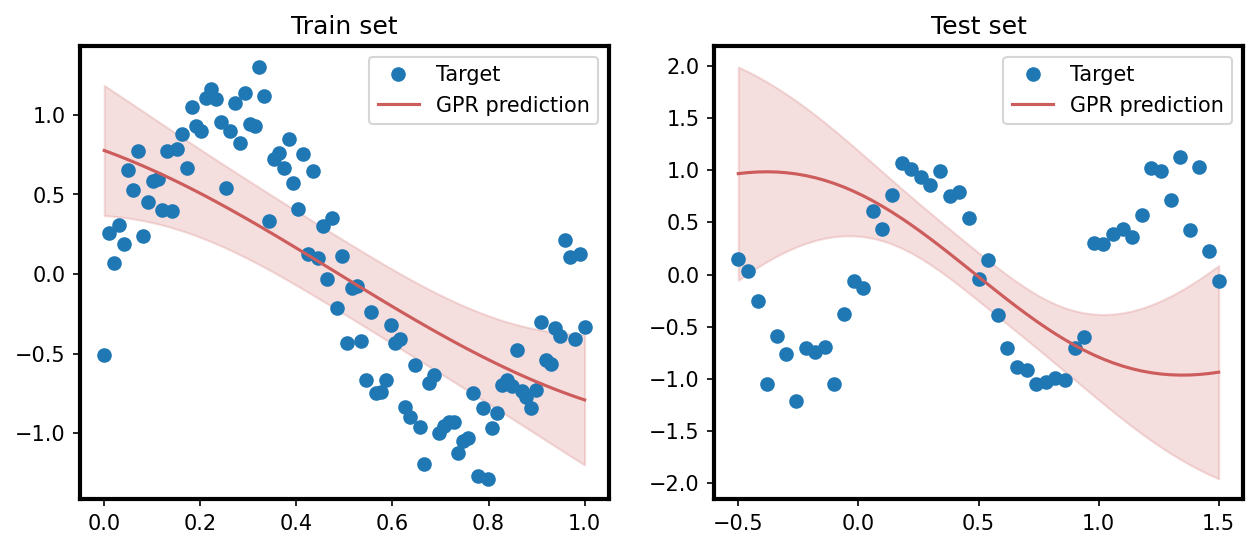

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(5*2, 4), dpi=150)
[[b.set_linewidth(2) for b in ax.spines.values()] for ax in axes]

ax = axes[0]
ax.set_title('Train set')
ax.plot(train_x, train_y, 'o', label='Target')
ax.plot(train_x, train_y_pred, color='indianred', label='GPR prediction')
ax.fill_between(train_x.reshape(-1), train_y_pred.reshape(-1) - train_conf, train_y_pred.reshape(-1) + train_conf, alpha=0.2, color='indianred')
ax.legend()

ax = axes[1]
ax.set_title('Test set')
ax.plot(test_x, test_y, 'o', label='Target')
ax.plot(test_x, test_y_pred, color='indianred', label='GPR prediction')
ax.fill_between(test_x.reshape(-1), test_y_pred.reshape(-1) - test_conf, test_y_pred.reshape(-1) + test_conf, alpha=0.2, color='indianred')
ax.legend()

In [15]:
# Optimize hyperparameters with Adam
params = gpr_optimize(params, train_x, train_y, kernel=se_kernel, n_steps=500, step_size=0.1)

 loss : 101.646
 loss : 4.385
 loss : 4.482
 loss : 2.429
 loss : 2.266
 loss : 2.239
 loss : 2.239
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238
 loss : 2.238


In [17]:
# Dual coefficients and target mean
c, y_mean = gpr_fit(params, train_x, train_y, kernel=se_kernel)

# Train prediction
train_y_pred, C_train = gpr_predict(params, train_x, train_x, c, y_mean, kernel=se_kernel, full_covariance=True)
train_conf = 2. * jnp.sqrt(jnp.diag(C_train))

# Test prediction
test_y_pred, C_test = gpr_predict(params, train_x, test_x, c, y_mean, kernel=se_kernel, full_covariance=True)
test_conf = 2. * jnp.sqrt(jnp.diag(C_test))

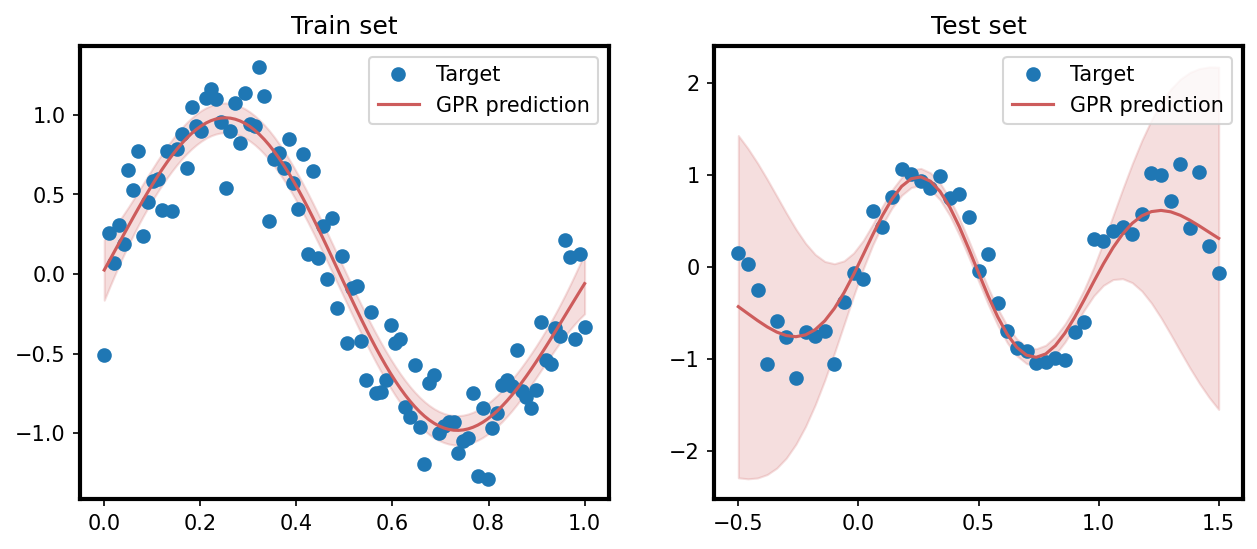

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(5*2, 4), dpi=150)
[[b.set_linewidth(2) for b in ax.spines.values()] for ax in axes]

ax = axes[0]
ax.set_title('Train set')
ax.plot(train_x, train_y, 'o', label='Target')
ax.plot(train_x, train_y_pred, color='indianred', label='GPR prediction')
ax.fill_between(train_x.reshape(-1), train_y_pred.reshape(-1) - train_conf, train_y_pred.reshape(-1) + train_conf, alpha=0.2, color='indianred')
ax.legend()

ax = axes[1]
ax.set_title('Test set')
ax.plot(test_x, test_y, 'o', label='Target')
ax.plot(test_x, test_y_pred, color='indianred', label='GPR prediction')
ax.fill_between(test_x.reshape(-1), test_y_pred.reshape(-1) - test_conf, test_y_pred.reshape(-1) + test_conf, alpha=0.2, color='indianred')
ax.legend()